## Importing And Installing Necessary Libraries

In [ ]:
!pip install statistics

  Preparing metadata (setup.py) ... done
  Created wheel for statistics: filename=statistics-1.0.3.5-py3-none-any.whl size=7438 sha256=725272b1ca8536803b0f84922a87493eff64b4b2858d6a164e648259fe922948
  Stored in directory: /root/.cache/pip/wheels/59/bd/aa/41ad56fbb723d36e457b5be74feb992cdac2855a6999ba34a1
Successfully built statistics


In [ ]:
import pandas as pd
import numpy as np
import statistics as st
import matplotlib.pyplot as plt

## Insights Of The Data

In [ ]:
df = pd.read_csv('/content/raw_data.csv')

In [ ]:
pd.set_option('display.max_columns', None)
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no


# Insights of the data

### Features
age - continuous feature. Age of the customer

job - multi class categorical feature. Job type of the customer

marital - multi class categorical feature. marital status of the customer whether he/she is single or married or divorced

education_qual - multi class categorical feature. education qualification of the customer

call_type - multi class categorical feature. call type in which the company employees contacted the customer

day - continuous feature. which day of the month the employees contacted the customer

mon - multi class categorical feature. which month the employees contacted the customer

dur - continuous feature. duration of the call in seconds. Longer the duration, more chance the customer takes insurance

num_calls - continuous feature. number of calls made to the customer by the employees

prev_outcome - multi class categorical feature. the status of the previous call made to the customer

### Target

y - Binary categorical target variable. The customer takes insurance or not. Imbalnced target variable. Need to balnce it

## Generic Cleaning

In [ ]:
df.shape

(45211, 11)

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [ ]:
df.isnull().sum()
# no null values

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [ ]:
df.dtypes
# All the features and the target are in correct form of datatype

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

In [ ]:
df = df.drop_duplicates()

## Column Wise Cleaning

#### 'age' Column

In [ ]:
df['age'].value_counts()

32    2084
31    1996
33    1972
34    1929
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: age, Length: 77, dtype: int64

In [ ]:
df['age'].describe()
# Comparing value_counts and the summary, the aged persons can be considered as outliers here and these outliers are to be clipped.

count    45205.000000
mean        40.937087
std         10.619130
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [ ]:
q1 = df['age'].quantile(0.25)
q3 = df['age'].quantile(0.75)
iqr = q3 - q1

In [ ]:
lower_threshold = round(q1-(1.5*iqr))
upper_threshold = round(q3+(1.5*iqr))

In [ ]:
lower_threshold, upper_threshold

(10, 70)

In [ ]:
# clipping the outliers in 'age' column
df['age'] = df['age'].clip(lower_threshold, upper_threshold)

<ipython-input-16-6e832abf6844>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'] = df['age'].clip(lower_threshold, upper_threshold)


In [ ]:
df['age'].describe()

count    45205.000000
mean        40.863666
std         10.380009
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         70.000000
Name: age, dtype: float64

#### 'job' Column

In [ ]:
df['job'].value_counts()

blue-collar      9730
management       9457
technician       7596
admin.           5170
services         4153
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [ ]:
df.loc[df['job'] == 'unknown', 'job'] = np.nan

In [ ]:
df['job'].isnull().sum()

288

In [ ]:
# Imputing the missing values with mode
df = df.fillna({'job' : st.mode(df['job'])})

In [ ]:
df['job'].value_counts()

blue-collar      10018
management        9457
technician        7596
admin.            5170
services          4153
retired           2264
self-employed     1579
entrepreneur      1487
unemployed        1303
housemaid         1240
student            938
Name: job, dtype: int64

#### 'marital' Column

In [ ]:
df['marital'].value_counts()
# this column need no imputations or corrections

married     27210
single      12788
divorced     5207
Name: marital, dtype: int64

#### 'education_qual' Column

In [ ]:
df['education_qual'].value_counts()

secondary    23199
tertiary     13299
primary       6850
unknown       1857
Name: education_qual, dtype: int64

In [ ]:
# imputing 'unknown' with mode
df.loc[df['education_qual'] == 'unknown', 'education_qual'] = st.mode(df['education_qual'])

In [ ]:
df['education_qual'].value_counts()

secondary    25056
tertiary     13299
primary       6850
Name: education_qual, dtype: int64

#### 'call_type' Column

In [ ]:
df['call_type'].value_counts()
# the 'unknown' in this column are reasonable values in this column. They cannot be considered as null values
# So, this column need no imputations or corrections

cellular     29282
unknown      13017
telephone     2906
Name: call_type, dtype: int64

#### 'day' Column

In [ ]:
df['day'].value_counts()
# There are no unstructured data in this column. And
# this column need no imputations or corrections

20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1840
28    1829
7     1817
19    1756
29    1745
15    1703
12    1603
13    1585
30    1566
9     1560
11    1479
4     1445
16    1415
2     1292
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: day, dtype: int64

#### 'mon' Column

In [ ]:
df['mon'].value_counts()
# There are no unstructured data in this column. And
# this column need no imputations or corrections

may    13765
jul     6894
aug     6245
jun     5339
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: mon, dtype: int64

#### 'dur' Column

In [ ]:
df['dur'].describe()
# The max value is very high compared to q3. So, clipping of outliers required

count    45205.000000
mean       258.183055
std        257.538504
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: dur, dtype: float64

In [ ]:
q1 = df['dur'].quantile(0.25)
q3 = df['dur'].quantile(0.75)
iqr = q3-q1

In [ ]:
lower_threshold = round(q1-(1.5*iqr))
upper_threshold  = round(q3+(1.5*iqr))

In [ ]:
lower_threshold, upper_threshold

(-221, 643)

In [ ]:
df['dur'] = df['dur'].clip(lower_threshold, upper_threshold)

In [ ]:
df['dur'].describe()

count    45205.00000
mean       234.95620
std        176.75476
min          0.00000
25%        103.00000
50%        180.00000
75%        319.00000
max        643.00000
Name: dur, dtype: float64

#### 'num_calls' Column

In [ ]:
df['num_calls'].value_counts()
# the customers who had number of calls more than 10 are very less. It needs clipping

1     17542
2     12503
3      5521
4      3520
5      1764
6      1291
7       735
8       540
9       327
10      266
11      201
12      155
13      133
14       93
15       84
16       79
17       69
18       51
19       44
20       43
21       35
22       23
25       22
23       22
24       20
29       16
28       16
26       13
31       12
27       10
32        9
30        8
33        6
34        5
36        4
35        4
43        3
38        3
37        2
50        2
41        2
46        1
58        1
55        1
63        1
51        1
39        1
44        1
Name: num_calls, dtype: int64

In [ ]:
df['num_calls'].describe()

count    45205.000000
mean         2.763898
std          3.098189
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: num_calls, dtype: float64

In [ ]:
q1 = df['num_calls'].quantile(0.25)
q3 = df['num_calls'].quantile(0.75)
iqr = q3-q1

In [ ]:
lower_threshold = round(q1-(1.5*iqr))
upper_threshold  = round(q3+(1.5*iqr))

In [ ]:
lower_threshold, upper_threshold

(-2, 6)

In [ ]:
df['num_calls'] = df['num_calls'].clip(lower_threshold, upper_threshold)

In [ ]:
df['num_calls'].describe()

count    45205.000000
mean         2.392235
std          1.600152
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: num_calls, dtype: float64

#### 'prev_outcome' Column

In [ ]:
df['prev_outcome'].value_counts()
# the 'unknown' in this column are reasonable values in this column. They cannot be considered as null values
# So, this column need no imputations or corrections

unknown    36953
failure     4901
other       1840
success     1511
Name: prev_outcome, dtype: int64

#### 'y' Column

In [ ]:
df['y'].value_counts()
# There are no unstructured data in this column. And
# this column need no imputations or corrections

no     39916
yes     5289
Name: y, dtype: int64

## Final Checks

In [ ]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [ ]:
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.shape

(45194, 11)

## Countplot of the Distribution of Categorical Features in the Data

In [ ]:
df['job'].value_counts().index[::-1]
# to get the unique values in ascending order of the value_counts

Index(['student', 'housemaid', 'unemployed', 'entrepreneur', 'self-employed',
       'retired', 'services', 'admin.', 'technician', 'management',
       'blue-collar'],
      dtype='object')

In [ ]:
!pip install seaborn==0.11

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 283.1/283.1 kB 9.1 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2


In [ ]:
import seaborn as sns

/usr/local/lib/python3.10/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Customers according to job')

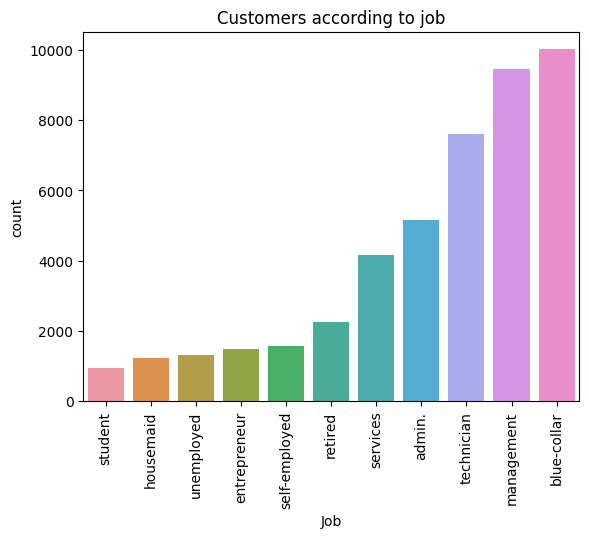

In [ ]:
sns.countplot(df['job'], order = df['job'].value_counts().index[::-1])
plt.xticks(rotation=90)
plt.xlabel('Job')
plt.ylabel('count')
plt.title('Customers according to job')

# Insights
# Acc to the distribution of 'job' feature, most of the calls were made to blue-collar followed by management followed by technician
# The least number of calls were made to students, house-maid, unemployed

/usr/local/lib/python3.10/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Customers according to marital status')

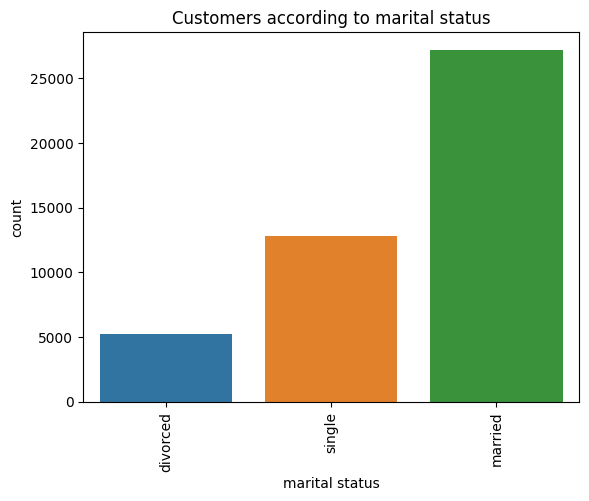

In [ ]:
sns.countplot(df['marital'], order = df['marital'].value_counts().index[::-1])
plt.xticks(rotation=90)
plt.xlabel('marital status')
plt.ylabel('count')
plt.title('Customers according to marital status')

# Insights
# Acc to the distribution of 'marital' feature, most calls were made to married followed by single
# Least calls were made to divorced

/usr/local/lib/python3.10/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Customers according to education qualification')

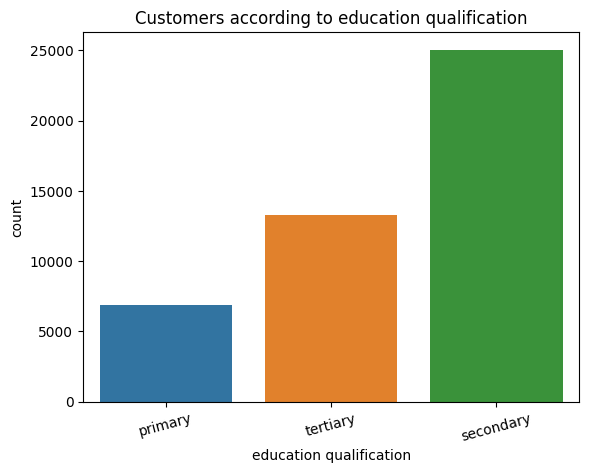

In [ ]:
sns.countplot(df['education_qual'], order = df['education_qual'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('education qualification')
plt.ylabel('count')
plt.title('Customers according to education qualification')

# Insights
# Acc to the distribution of 'education_qual' feature, most calls were made to secondary followed by tertiary
# Least calls were made to primary

/usr/local/lib/python3.10/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Customers according to call type')

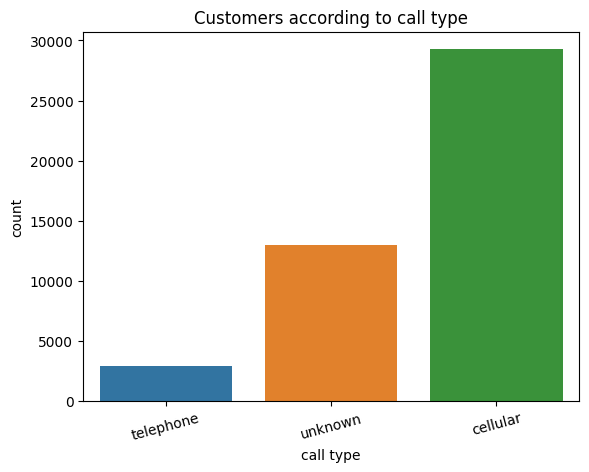

In [ ]:
sns.countplot(df['call_type'], order = df['call_type'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('call type')
plt.ylabel('count')
plt.title('Customers according to call type')

# Insights
# Acc to the distribution of 'call_type' feature, most calls were made to cellular followed by unknown
# Least calls were made to telephone

/usr/local/lib/python3.10/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Customers according to day of the month')

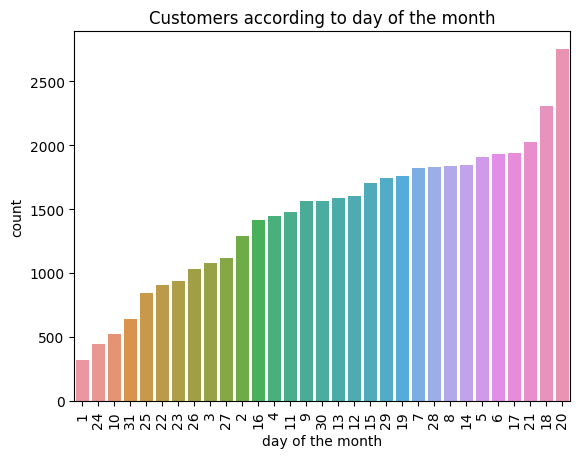

In [ ]:
# Here day is considered as categorical feature since it have unique values from 1 to 31 and we can see the distribution of it
sns.countplot(df['day'], order = df['day'].value_counts().index[::-1])
plt.xticks(rotation=90)
plt.xlabel('day of the month')
plt.ylabel('count')
plt.title('Customers according to day of the month')

# Insights
# Acc to the distribution of 'day' feature, most calls were made on 20th day followed by 18th day followed by 21st day
# Least calls were made on 1st, 24th, 10th days

/usr/local/lib/python3.10/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Customers according to month')

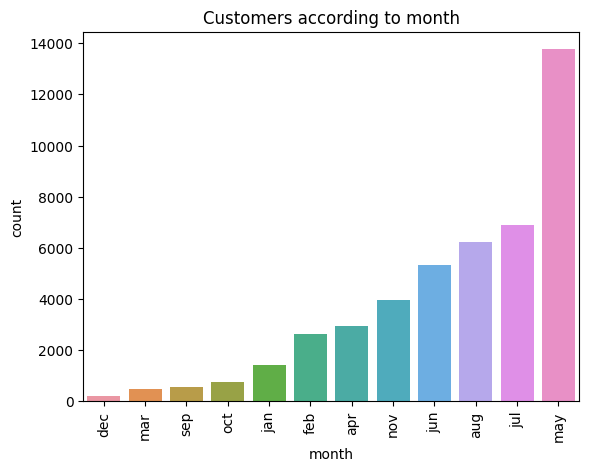

In [ ]:
sns.countplot(df['mon'], order = df['mon'].value_counts().index[::-1])
plt.xticks(rotation=90)
plt.xlabel('month')
plt.ylabel('count')
plt.title('Customers according to month')

# Insights
# Acc to the distribution of 'mon' feature, most of the calls were made on May followed by July followed by August
# The least number of calls were made on Dec, Mar, Sept

/usr/local/lib/python3.10/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Customers according to previous outcome')

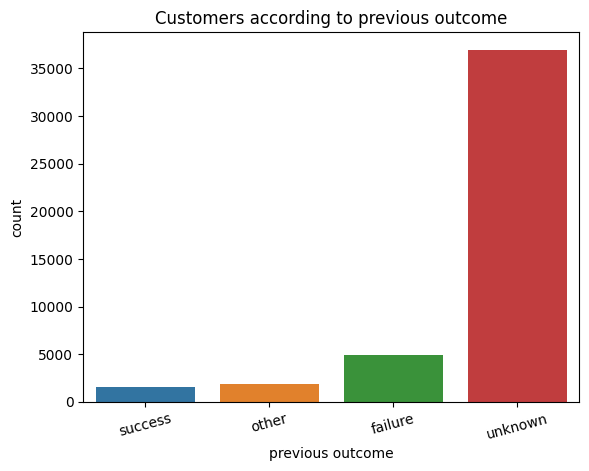

In [ ]:
sns.countplot(df['prev_outcome'], order = df['prev_outcome'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('previous outcome')
plt.ylabel('count')
plt.title('Customers according to previous outcome')

# Insights
# Acc to the distribution of 'prev_outcome' feature, the status of most of the calls are unknown followed by failure followed by other
# The least number of calls status are success here

## Boxplot of the Distribution of Continuous Features in the Data

Text(0.5, 1.0, 'Customers according to age')

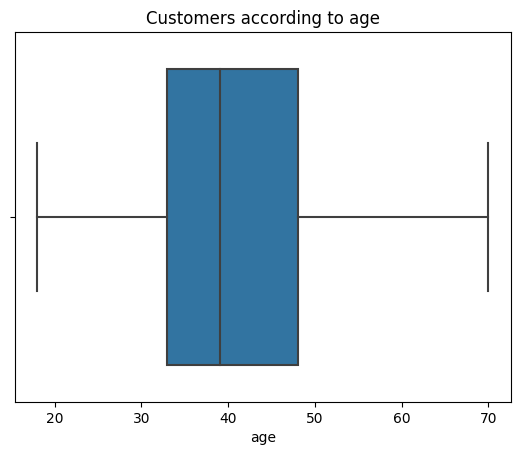

In [ ]:
sns.boxplot(x = df['age'])
plt.title('Customers according to age')

# Insights
# Acc to the distribution of 'age' feature, most calls were made to the people of age between 32 to 48 approximately
# The median lies around 39 approximately
# Since clipping of 'age' column is already done, there are no outliers found in this plot

Text(0.5, 1.0, 'Customers according to duration of a call')

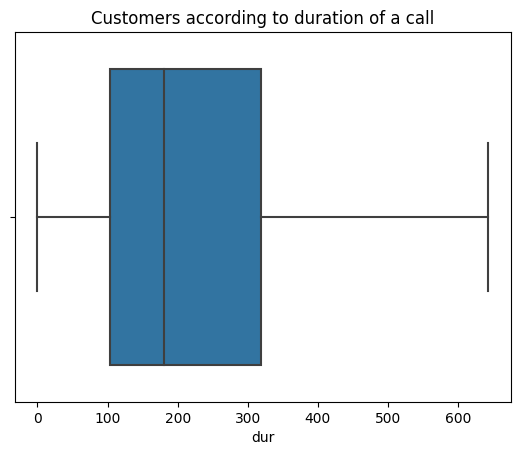

In [ ]:
sns.boxplot(x = df['dur'])
plt.title('Customers according to duration of a call')

# Insights
# Acc to the distribution of 'dur' feature, most calls lasted in the range of 100 to 320 seconds approximately
# The median lies around 180 approximately
# Since clipping of 'dur' column is already done, there are no outliers found in this plot

Text(0.5, 1.0, 'Customers according to number of calls made to a customer')

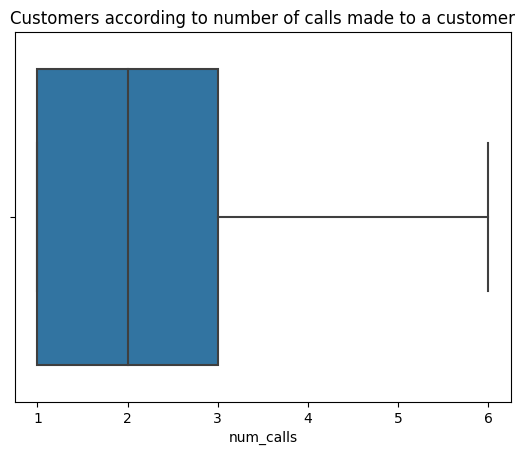

In [ ]:
sns.boxplot(x = df['num_calls'])
plt.title('Customers according to number of calls made to a customer')

# Insights
# Acc to the distribution of 'num_calls' feature, the highest number of calls made to a customer is in the range of 1 to 3
# The median lies around 2 approximately
# Since clipping of 'num_calls' column is already done, there are no outliers found in this plot

## Countplot of the Distribution of Target Variable in the Data

/usr/local/lib/python3.10/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Customers according to target variable')

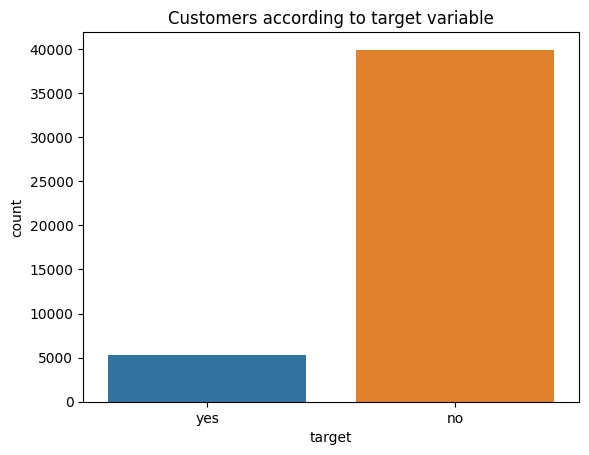

In [ ]:
sns.countplot(df['y'], order = df['y'].value_counts().index[::-1])
plt.xlabel('target')
plt.ylabel('count')
plt.title('Customers according to target variable')

# Insights
# Acc to the distribution of the target variable, Most of the calls made to customers lead to the people not taking the insurance
# Very less number of customers atlast are opting for insurance
# From this plot, it is clearly seen that it is an imbalanced target data.
# We need to balance it before applying any ML techniques to get the perfect result

## Feature v/s Target Plot for Categorical Columns

In [ ]:
# Encoding the target variable to 1 and 0
df['y'] = df['y'].map({'yes' : 1, 'no' : 0})

Text(0.5, 1.0, 'Distribution of job with respect to customers who opted for insurance')

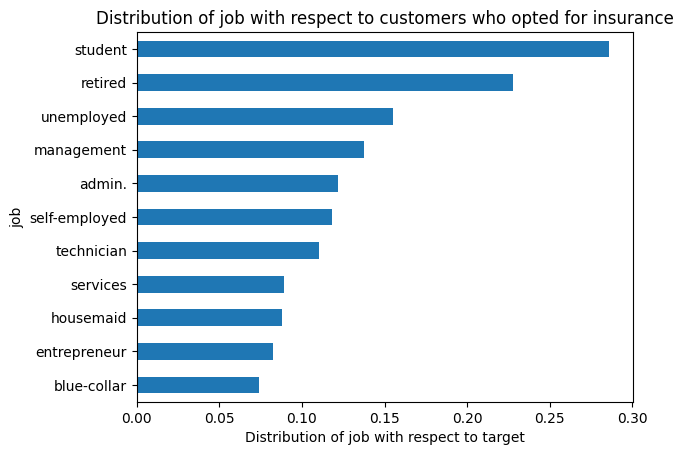

In [ ]:
df.groupby('job')['y'].mean().sort_values().plot(kind = 'barh')
plt.xlabel('Distribution of job with respect to target')
plt.title('Distribution of job with respect to customers who opted for insurance')

### Insights
From the 'job' v/s 'y' barplot, the most who are opting for insurance are student followed by retired followed by unemployed.

The least in this plot are blue-collar, entreprenuer, house-maid

With respect to target variable, 'job' column have linearly increasing pattern. So, Label Encoding shall be done to this column

### Suggestion to the company

When comparing Distribution of the feature 'job' and 'job' v/s 'y' barplot, More number of customers from student, retired and unemployed are opting for insurance. But these types of customers were called the least.

Meanwhile, least customers from blue-collar opted for insurance. But the insurance company called those categories the most.

So, the insurance company have to make more calls on student, retired and unemployed rather than blue-collar.

Text(0.5, 1.0, 'Distribution of marital status with respect to customers who opted for insurance')

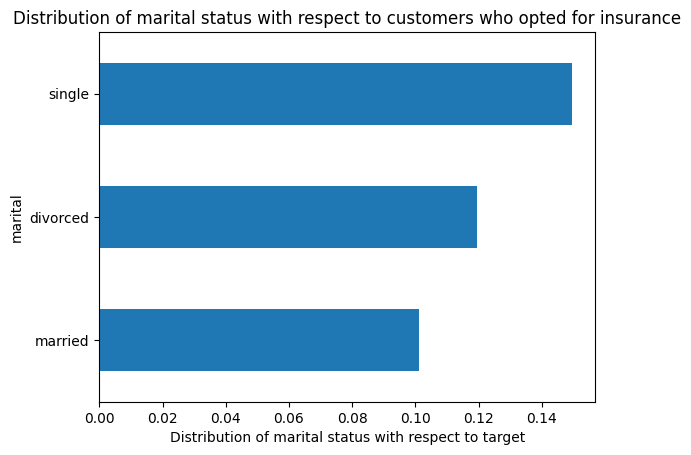

In [ ]:
df.groupby('marital')['y'].mean().sort_values().plot(kind='barh')
plt.xlabel('Distribution of marital status with respect to target')
plt.title('Distribution of marital status with respect to customers who opted for insurance')

### Insights
From the 'marital' v/s 'y' barplot, the most who are opting for insurance are single followed by divorced

The least in this plot are married

With respect to target variable, 'marital' column follows linearly increasing pattern. So, Label Encoding shall be done to this column

### Suggestion to the company

When comparing Distribution of the feature 'marital' and 'marital' v/s 'y' barplot, More number of customers from single and divorced are opting for insurance. But these types of customers were called lesser than married ones

Meanwhile, least customers from married opted for insurance. But the insurance company called those people the most.

So, the insurance company have to make more calls on single and divorced rather than married.

Text(0.5, 1.0, 'Distribution of education qualification with respect to customers who opted for insurance')

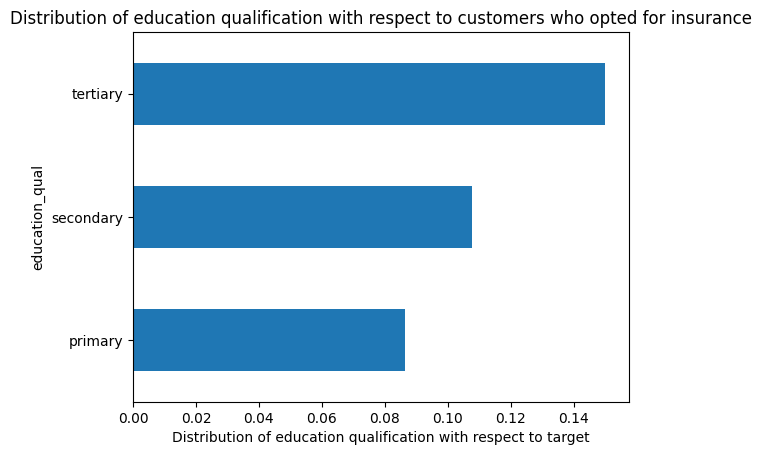

In [ ]:
df.groupby('education_qual')['y'].mean().sort_values().plot(kind='barh')
plt.xlabel('Distribution of education qualification with respect to target')
plt.title('Distribution of education qualification with respect to customers who opted for insurance')

### Insights
From the 'education_qual' v/s 'y' barplot, the most who are opting for insurance are tertiary followed by secondary

The least in this plot are primary

With respect to target variable, 'education_qual' column follows linearly increasing pattern. So, Label Encoding shall be done to this column

### Suggestion to the company

When comparing Distribution of the feature 'education_qual' and 'education_qual' v/s 'y' barplot, More number of customers from tertiary than secondary are opting for insurance. But these types of customers were called lesser than the secondary category.

So, the insurance company have to make more calls on tertiary rather than secondary.

Text(0.5, 1.0, 'Distribution of call type with respect to customers who opted for insurance')

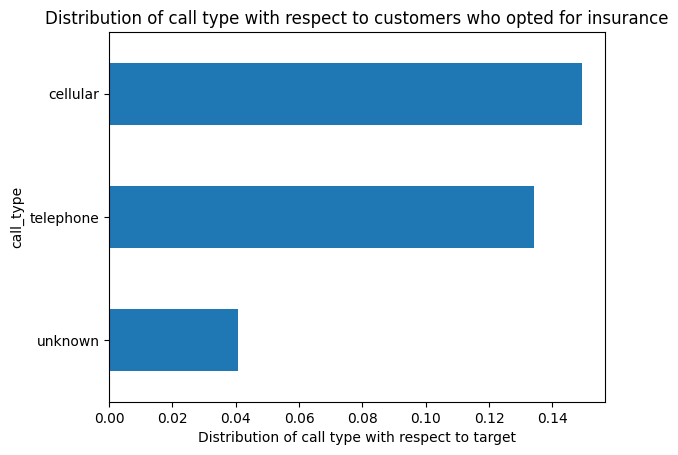

In [ ]:
df.groupby('call_type')['y'].mean().sort_values().plot(kind='barh')
plt.xlabel('Distribution of call type with respect to target')
plt.title('Distribution of call type with respect to customers who opted for insurance')

### Insights
From the 'call_type' v/s 'y' barplot, the most who are opting for insurance are cellular followed by telephone

The least in this plot are unknown

With respect to target variable, 'call_type' column follows linearly increasing pattern. So, Label Encoding shall be done to this column

### Suggestion to the company

When comparing Distribution of the feature 'call_type' and 'call_type' v/s 'y' barplot, More number of customers from telephone than unknown are opting for insurance. But these types of customers were called lesser than the unknown category.

So, the insurance company have to make more calls on telephone rather than unknown.

Text(0.5, 1.0, 'Distribution of day of the month with respect to customers who opted for insurance')

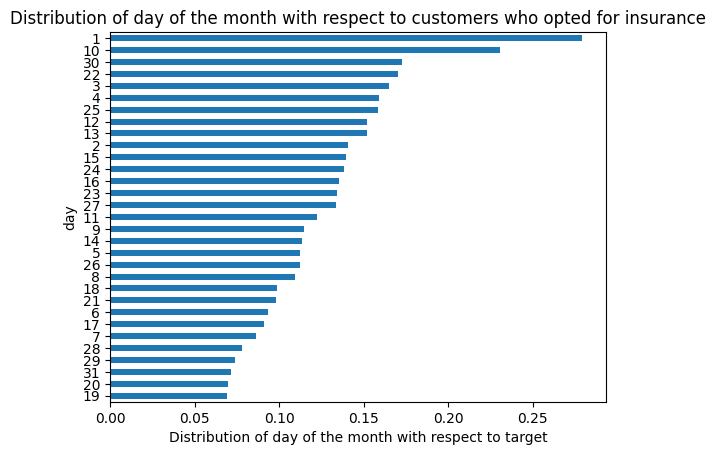

In [ ]:
df.groupby('day')['y'].mean().sort_values().plot(kind='barh')
plt.xlabel('Distribution of day of the month with respect to target')
plt.title('Distribution of day of the month with respect to customers who opted for insurance')

### Insights
From the 'day' v/s 'y' barplot, the most who are opting for insurance were called on the dates 1st followed by 10th followed by 30th.

The least who are opting for insurance were called on the dates 19th, 20th and 31st.

### Suggestion to the company

When comparing Distribution of the feature 'day' and 'day' v/s 'y' barplot, More number of customers opted for insurance on the dates 1st, 10th and 30th. But On those dates, less number of customers were called.

Meanwhile, least customers have taken insurance on the dates 19th, 20th and 31st. But the insurance company called more number of people on those dates.

So, the insurance company have to make more calls on start, mid and last day of the month to gain more customers from leads.

Text(0.5, 1.0, 'Distribution of month with respect to customers who opted for insurance')

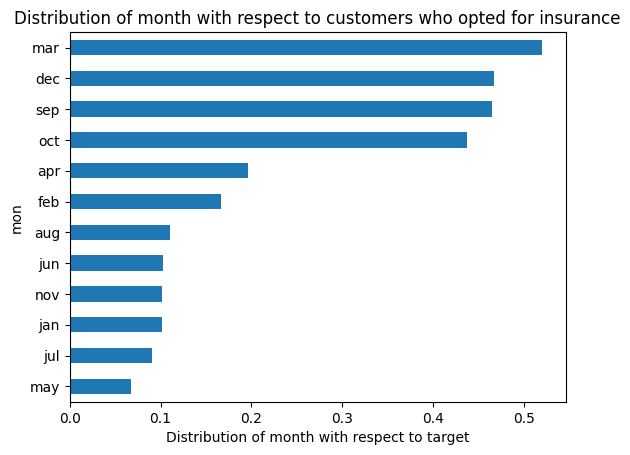

In [ ]:
df.groupby('mon')['y'].mean().sort_values().plot(kind='barh')
plt.xlabel('Distribution of month with respect to target')
plt.title('Distribution of month with respect to customers who opted for insurance')

### Insights
From the 'mon' v/s 'y' barplot, the most who are opting for insurance were called on the months Mar followed by Dec followed by Sep

The least who are opting for insurance were called on the months May, July and Jan

With respect to target variable, 'mon' column follows linearly increasing pattern. So, Label Encoding shall be done to this column

### Suggestion to the company

When comparing Distribution of the feature 'mon' and 'mon' v/s 'y' barplot, More number of customers opted for insurance on the months Mar, Dec and Sept. But On those months, less number of customers were called.

Meanwhile, least customers have taken insurance on the months May, July and Jan. But the insurance company called more number of people on those months.

So, the insurance company have to make more calls on Mar, Dec and Sept rather than calling on the months May, July and Jan to gain more customers.



Text(0.5, 1.0, 'Distribution of prev_outcome with respect to customers who opted for insurance')

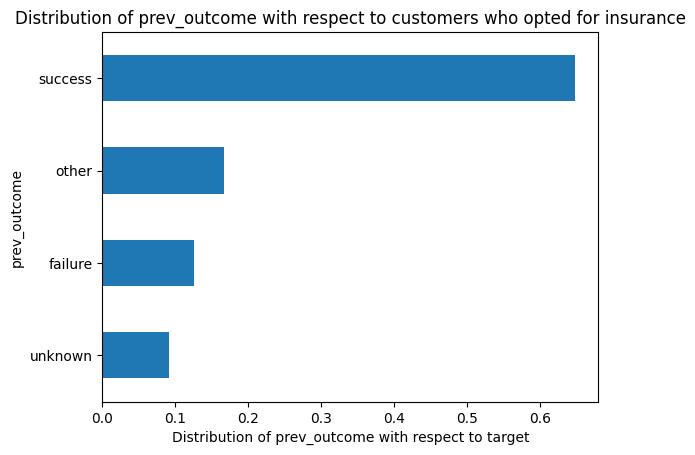

In [ ]:
df.groupby('prev_outcome')['y'].mean().sort_values().plot(kind='barh')
plt.xlabel('Distribution of prev_outcome with respect to target')
plt.title('Distribution of prev_outcome with respect to customers who opted for insurance')

### Insights
From the 'prev_outcome' v/s 'y' barplot, the most who are opting for insurance are from the category success followed by other followed by failure.

The least in this plot are unknown

With respect to target variable, 'prev_outcome' column have linearly increasing pattern. So, Label Encoding shall be done to this column

### Suggestion to the company

When comparing Distribution of the feature 'prev_outcome' and 'prev_outcome' v/s 'y' barplot, More number of customers from success, other and failure category are opting for insurance. But these types of customers were called the least

Meanwhile, least customers from unknown category opted for insurance. But the insurance company called them the most

So, the insurance company should try to convert the previous outcome of the customers to success to gain more customers

## Feature v/s Target Plot for Continuous Columns

/usr/local/lib/python3.10/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Age v/s Target Line Plot')

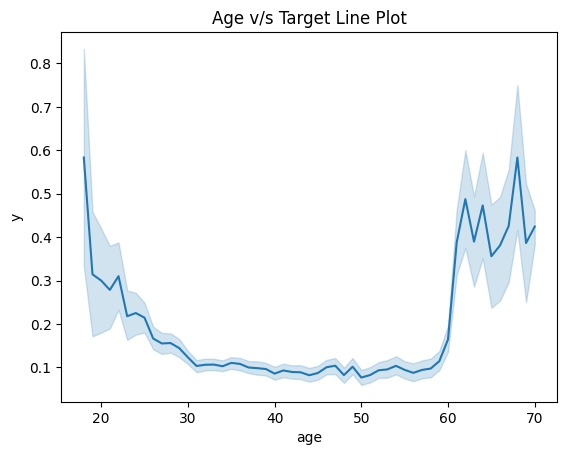

In [ ]:
sns.lineplot(df['age'], df['y'])
plt.title('Age v/s Target Line Plot')

### Insights
From the 'age' v/s 'y' lineplot, the most who are opting for insurance are in the age of 18-25 and 60-70

The least in this plot are of age 25-59

With respect to target variable, 'age' column have varying patterns which are increasing as well as decreasing

### Suggestion to the company

When comparing Distribution of the feature 'age' and 'age' v/s 'y' line plot, More number of customers in the age of 18-25 and 60-70 are opting for insurance. But the customers of this age were called the least

Meanwhile, least customers of age 25-59 opted for insurance. But the insurance company called them the most

So, the insurance company need to concentrate more on youngsters and older people rather than calling middle aged people

/usr/local/lib/python3.10/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Duration (in seconds) v/s Target Line Plot')

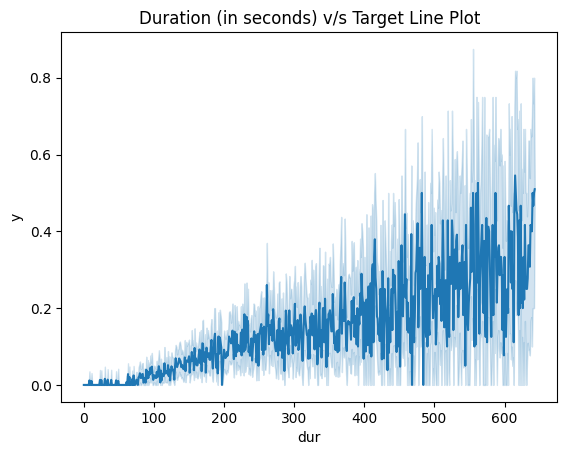

In [ ]:
sns.lineplot(df['dur'], df['y'])
plt.title('Duration (in seconds) v/s Target Line Plot')

### Insights
From the 'dur' v/s 'y' lineplot, the most who are opting for insurance lasted in call for longer duration from 450-640 seconds

The least in this plot are of duration 0-200

With respect to target variable, 'dur' column have clear linearly increasing relationship with the target

### Suggestion to the company

When comparing Distribution of the feature 'dur' and 'dur' v/s 'y' line plot, More number of customers who lasted in the call from 450-640 seconds are opting for insurance. But the number of calls in this duration are the least

Meanwhile, minimal customers opted for insurance who lasted in the call from 0-200 seconds. But the insurance company made calls in this duration the most

So, the insurance company employees have to try to talk for longer duration to customers so that most of the customers will take the insurance

/usr/local/lib/python3.10/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of Calls v/s Target Line Plot')

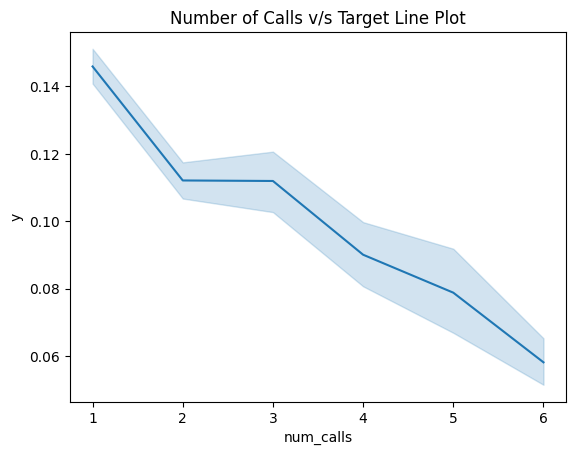

In [ ]:
sns.lineplot(df['num_calls'], df['y'])
plt.title('Number of Calls v/s Target Line Plot')

In [ ]:
# Acc to the distribution of 'num_calls' feature, the highest number of calls made to a customer is in the range of 1 to 3
# The median lies around 2 approximately

### Insights
From the 'num_calls' v/s 'y' lineplot, the most who are opting for insurance have got the calls 1 to 3 times

The least in this plot are 4 to 6 times

With respect to target variable, 'dur' column have clear linearly decreasing relationship with the target

### Suggestion to the company

When comparing Distribution of the feature 'dur' and 'dur' v/s 'y' line plot, the most who are opting for insurance have got the calls 1 to 3 times. And the highest most number of calls made to a customer is 1 to 3 times

So, the insurance company is in the right track with respect to num_calls column. It can continue in this same trend to gain more customers

## Encoding Categorical Columns

In [ ]:
# Since all the categorical feature follow linearly increasing relationship with target (Refer Feature v/s Target Plot),
# Label encoding is done since the feature is behaving ordinal with respect to target variable.

df['job'] = df['job'].map({'blue-collar':0, 'entrepreneur':1, 'housemaid':2, 'services':3, 'technician':4, 'self-employed':5, 'admin.':6, 'management':7, 'unemployed':8, 'retired':9, 'student':10})
df['marital'] = df['marital'].map({'married':0,'divorced':1,'single':2})
df['education_qual'] = df['education_qual'].map({'primary':0,'secondary':1,'tertiary':2})
df['call_type'] = df['call_type'].map({'unknown':0,'telephone':1,'cellular':2})
df['mon'] = df['mon'].map({'may':0, 'jul':1,  'jan':2, 'nov':3, 'jun':4, 'aug':5, 'feb':6, 'apr':7, 'oct':8, 'sep':9, 'dec':10, 'mar':11})
df['prev_outcome'] = df['prev_outcome'].map({'unknown':0,'failure':1,'other':2,'success':3})


In [ ]:
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,7,0,2,0,5,0,261,1,0,0
1,44,4,2,1,0,5,0,151,1,0,0
2,33,1,0,1,0,5,0,76,1,0,0
3,47,0,0,1,0,5,0,92,1,0,0
4,33,0,2,1,0,5,0,198,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,4,0,2,2,17,3,643,3,0,1
45207,70,9,1,0,2,17,3,456,2,0,1
45208,70,9,0,1,2,17,3,643,5,3,1
45209,57,0,0,1,1,17,3,508,4,0,0


## Splitting the Data

In [ ]:
x = df.drop('y', axis=1)
y = df['y']

In [ ]:
from sklearn.model_selection import train_test_split
x_tr, x_te, y_tr, y_te = train_test_split(x,y,test_size=0.25,random_state=1)

In [ ]:
x_tr.shape, x_te.shape, y_tr.shape, y_te.shape

((33895, 10), (11299, 10), (33895,), (11299,))

## Balancing the Data

In [ ]:
!pip install imblearn

In [ ]:
import imblearn

In [ ]:
from imblearn.combine import SMOTEENN
smt = SMOTEENN(sampling_strategy='all')
x_smt_tr,y_smt_tr = smt.fit_resample(x_tr,y_tr)

## Fit ML Models

#### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(x_smt_tr,y_smt_tr)
y_pred_log = log_model.predict(x_te)

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_log = cross_val_score(log_model, x_tr, y_tr, cv=10).mean()
cross_val_log

0.8924028372201928

In [ ]:
from sklearn.metrics import roc_auc_score
auroc_log = round(roc_auc_score(y_te, log_model.predict_proba(x_te)[:,1]),2)
auroc_log

0.88

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_te,y_pred_log)

array([[7407, 2623],
       [ 160, 1109]])

In [ ]:
# Interpretations
# 0.88 is the AUROC score for Logistic Regression model. This is a good fit model with a descent AUROC score

#### KNN ALGORITHM

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

k_values = np.arange(1,21)
cross_val_knn_list = []

for k in k_values:
  knn_model = KNeighborsClassifier(n_neighbors=k)
  knn_model.fit(x_smt_tr,y_smt_tr)
  print('K value: ', k, 'cross_val_score: ', cross_val_score(knn_model, x_tr,y_tr,cv=10).mean())
  cross_val_knn_list.append(cross_val_score(knn_model, x_tr,y_tr,cv=10).mean())


K value:  1 cross_val_score:  0.859683994112481
K value:  2 cross_val_score:  0.8814868684125546
K value:  3 cross_val_score:  0.8797461333778989
K value:  4 cross_val_score:  0.8846436806221064
K value:  5 cross_val_score:  0.8833161077266289
K value:  6 cross_val_score:  0.8842896983212214
K value:  7 cross_val_score:  0.8841717738545058
K value:  8 cross_val_score:  0.8846732661891543
K value:  9 cross_val_score:  0.8836112583571175
K value:  10 cross_val_score:  0.8843782026006402
K value:  11 cross_val_score:  0.8839948001124582
K value:  12 cross_val_score:  0.8856175062300293
K value:  13 cross_val_score:  0.8846143039557965
K value:  14 cross_val_score:  0.8858238218215971
K value:  15 cross_val_score:  0.8854402887704538
K value:  16 cross_val_score:  0.8858828449843369
K value:  17 cross_val_score:  0.8854992858206014
K value:  18 cross_val_score:  0.8862072765349636
K value:  19 cross_val_score:  0.8860006562964859
K value:  20 cross_val_score:  0.8863548562023065


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

k_values = np.arange(21,41)
cross_val_knn = []

for k in k_values:
  knn_model = KNeighborsClassifier(n_neighbors=k)
  knn_model.fit(x_smt_tr,y_smt_tr)
  print('K value: ', k, 'cross_val_score: ', cross_val_score(knn_model, x_tr,y_tr,cv=10).mean())
  cross_val_knn.append(cross_val_score(knn_model, x_tr,y_tr,cv=10).mean())

K value:  21 cross_val_score:  0.8854697872955276
K value:  22 cross_val_score:  0.8856467001081931
K value:  23 cross_val_score:  0.8855876160160715
K value:  24 cross_val_score:  0.8855581348993926
K value:  25 cross_val_score:  0.8860006824090781
K value:  26 cross_val_score:  0.8862662300641236
K value:  27 cross_val_score:  0.8859417549925099
K value:  28 cross_val_score:  0.8862367924684321
K value:  29 cross_val_score:  0.8857350738246504
K value:  30 cross_val_score:  0.8863251922974815
K value:  31 cross_val_score:  0.886266169134742
K value:  32 cross_val_score:  0.8862956850682104
K value:  33 cross_val_score:  0.8863546473015683
K value:  34 cross_val_score:  0.8862956937724078
K value:  35 cross_val_score:  0.8862071894929893
K value:  36 cross_val_score:  0.8856171319495401
K value:  37 cross_val_score:  0.8860006911132757
K value:  38 cross_val_score:  0.8859417027673256
K value:  39 cross_val_score:  0.8861187635513474
K value:  40 cross_val_score:  0.8859712709259787


In [ ]:
cross_val_knn_max = max(cross_val_knn)
cross_val_knn_max

0.8863546473015683

In [ ]:
print('The best value of k is 33 and cross val score is ', cross_val_knn_max)

The best value of k is 33 and cross val score is  0.8863546473015683


In [ ]:
# building knn model with best value of k
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
knn_model = KNeighborsClassifier(n_neighbors=33)
knn_model.fit(x_smt_tr,y_smt_tr)

KNeighborsClassifier(n_neighbors=33)

In [ ]:
cross_val_score_knn_best = cross_val_score(knn_model, x_tr,y_tr,cv=10).mean()
cross_val_score_knn_best

0.8863546473015683

In [ ]:
auroc_knn = round(roc_auc_score(y_te, knn_model.predict_proba(x_te)[:,1]),2)
auroc_knn

0.84

In [ ]:
# Interpretation
# 0.84 is the AUROC value of KNN model which is less than logistic regression model.

#### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

cross_val_dt_list = []

for d in [1,5,6,7,8,9,10,12,15]:
  dt_model = DecisionTreeClassifier(max_depth = d, random_state = 0)
  dt_model.fit(x_smt_tr,y_smt_tr)
  print('Depth: ', d, 'cross_val_score: ', cross_val_score(dt_model, x_tr, y_tr, cv=10).mean())
  cross_val_dt_list.append(cross_val_score(dt_model, x_tr, y_tr, cv=10).mean())

# depth = 5 is the best max_depth with high cross val score

Depth:  1 cross_val_score:  0.8814574482252577
Depth:  5 cross_val_score:  0.9008406687957133
Depth:  6 cross_val_score:  0.9003686401693489
Depth:  7 cross_val_score:  0.899188411927884
Depth:  8 cross_val_score:  0.8997783911335564
Depth:  9 cross_val_score:  0.8992769423198951
Depth:  10 cross_val_score:  0.8960903704593466
Depth:  12 cross_val_score:  0.8927270685742785
Depth:  15 cross_val_score:  0.8881541791898308


In [ ]:
cross_val_dt_max = max(cross_val_dt_list)

In [ ]:
print('The best depth is 5 and cross val score is ', cross_val_dt_max)

The best depth is 5 and cross val score is  0.9008406687957133


In [ ]:
# Building decision tree model with best max_depth value
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(max_depth = 5, random_state = 0)
dt_model.fit(x_smt_tr,y_smt_tr)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [ ]:
cross_val_dt_best = cross_val_score(dt_model, x_tr, y_tr, cv=10).mean()
cross_val_dt_best

0.9008406687957133

In [ ]:
auroc_dt = round(roc_auc_score(y_te, dt_model.predict_proba(x_te)[:,1]),2)
auroc_dt

0.87

In [ ]:
# Interpretations
# 0.87 is the AUROC value of Decision Tree Model which is still less than logistic regression model.

#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

cross_val_rf = []

for d in [1,5,10,15,20,22,24,26,28,30,32,34,36]:
  rf_model = RandomForestClassifier(max_depth = d, random_state = 1)
  rf_model.fit(x_smt_tr,y_smt_tr)
  print('Depth: ', d, 'cross_val_score: ', cross_val_score(rf_model, x_tr, y_tr, cv=10).mean())
  cross_val_rf.append(cross_val_score(rf_model, x_tr, y_tr, cv=10).mean())

# depth = 10 is the best depth.

Depth:  1 cross_val_score:  0.8814574482252577
Depth:  5 cross_val_score:  0.8960614028903157
Depth:  10 cross_val_score:  0.9041449910390286
Depth:  15 cross_val_score:  0.9039384578425255
Depth:  20 cross_val_score:  0.9034663943993714
Depth:  22 cross_val_score:  0.9024633923216794
Depth:  24 cross_val_score:  0.9029647105723795
Depth:  26 cross_val_score:  0.9020796503697979
Depth:  28 cross_val_score:  0.9025221891752861
Depth:  30 cross_val_score:  0.9021387518703146
Depth:  32 cross_val_score:  0.9034959103328397
Depth:  34 cross_val_score:  0.9034958842202476
Depth:  36 cross_val_score:  0.9034073886450263


In [ ]:
cross_val_rf_max = max(cross_val_rf)

In [ ]:
print("The best value of max_depth is 10 and cross val score is ", cross_val_rf_max)

The best value of max_depth is 10 and cross val score is  0.9041449910390286


In [ ]:
# Building the random forest model mwith best max_depth model
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(max_depth = 10, random_state = 0)
rf_model.fit(x_smt_tr,y_smt_tr)

RandomForestClassifier(max_depth=10, random_state=0)

In [ ]:
cross_val_rf_best = cross_val_score(rf_model, x_tr, y_tr, cv=10).mean()

In [ ]:
cross_val_rf_best

0.9035844755416405

In [ ]:
auroc_rf = roc_auc_score(y_te, rf_model.predict_proba(x_te)[:,1])
auroc_rf = round(auroc_rf, 2)
auroc_rf

0.9

In [ ]:
# Interpretations
# 0.9 is the auroc score of random forest model. Out of all the model trained so far, random forest gives the best result with
# good auroc value.

#### Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

cross_val_gb = []
for lr in [0.01,0.05,0.08,0.1,0.15,0.2,0.3,0.5,0.7,0.9,1]:
  gb_model = GradientBoostingClassifier(learning_rate = lr)
  gb_model.fit(x_smt_tr, y_smt_tr)
  print('Learning rate: ', lr, 'cross_val_score: ', cross_val_score(gb_model,x_tr,y_tr,cv=10).mean())
  cross_val_gb.append(cross_val_score(gb_model,x_tr,y_tr,cv=10).mean())

Learning rate:  0.01 cross_val_score:  0.8856469090089314
Learning rate:  0.05 cross_val_score:  0.9032895425160875
Learning rate:  0.08 cross_val_score:  0.9043810575773955
Learning rate:  0.1 cross_val_score:  0.9047940456326253
Learning rate:  0.15 cross_val_score:  0.9069771976140053
Learning rate:  0.2 cross_val_score:  0.9067412268218102
Learning rate:  0.3 cross_val_score:  0.9067116847757493
Learning rate:  0.5 cross_val_score:  0.9051775699795712
Learning rate:  0.7 cross_val_score:  0.9044399153603843
Learning rate:  0.9 cross_val_score:  0.9022860268907478
Learning rate:  1 cross_val_score:  0.901696126022852


In [ ]:
cross_val_gb_max = max(cross_val_gb)

In [ ]:
print('The best learning rate is 0.15 and cross val score is ', cross_val_gb_max)

The best learning rate is 0.15 and cross val score is  0.9069771976140053


In [ ]:
# Buiding gradient boosting model with best learning rate
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier(learning_rate = 0.15)
gb_model.fit(x_smt_tr, y_smt_tr)

GradientBoostingClassifier(learning_rate=0.15)

In [ ]:
cross_val_gb_best = cross_val_score(gb_model,x_tr,y_tr,cv=10).mean()
cross_val_gb_best

0.9069771976140053

In [ ]:
auroc_gb = roc_auc_score(y_te, gb_model.predict_proba(x_te)[:,1])
auroc_gb = round(auroc_gb,2)
auroc_gb

0.9

In [ ]:
# Interpretations
# 0.9 is the auroc score of gradient boosting model. Out of all the models trained so far, random forest and gradient boosting
# gives the best result with good auroc value of 0.9

#### XGBoost

In [ ]:
import xgboost as xgb

cross_val_xgb = []
for lr in [0.01,0.05,0.08,0.1,0.15,0.2,0.3,0.5,0.7,0.9,1]:
  xgb_model = xgb.XGBClassifier(colsample_bytree = 0.4, learning_rate = lr, n_estimators = 100)
  xgb_model.fit(x_smt_tr,y_smt_tr)
  print('Learning rate: ', lr, 'cross val score: ', cross_val_score(xgb_model, x_tr, y_tr, cv=10).mean())
  cross_val_xgb.append(cross_val_score(xgb_model, x_tr, y_tr, cv=10).mean())

# learning rate of 0.2 is the best learning rate

Learning rate:  0.01 cross val score:  0.8899837666718022
Learning rate:  0.05 cross val score:  0.9034959538538269
Learning rate:  0.08 cross val score:  0.9055907321187495
Learning rate:  0.1 cross val score:  0.9057676536356128
Learning rate:  0.15 cross val score:  0.9057677145649945
Learning rate:  0.2 cross val score:  0.9073018380653701
Learning rate:  0.3 cross val score:  0.9044991996490467
Learning rate:  0.5 cross val score:  0.9027878412807008
Learning rate:  0.7 cross val score:  0.9011063034927332
Learning rate:  0.9 cross val score:  0.8972119324101661
Learning rate:  1 cross val score:  0.8946451429272738


In [ ]:
cross_val_xgb_max = max(cross_val_xgb)

In [ ]:
print('the best learning rate is 0.2 and cross val score is ', cross_val_xgb_max)

the best learning rate is 0.2 and cross val score is  0.9073018380653701


In [ ]:
# building the xgboost model with best learning rate value
import xgboost as xgb
xgb_model = xgb.XGBClassifier(colsample_bytree = 0.4, learning_rate = 0.2, n_estimators = 100)
xgb_model.fit(x_smt_tr,y_smt_tr)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
cross_val_xgb_best = cross_val_score(xgb_model, x_tr, y_tr, cv=10).mean()
cross_val_xgb_best

0.9073018380653701

In [ ]:
auroc_xgb = roc_auc_score(y_te, xgb_model.predict_proba(x_te)[:,1])
auroc_xgb = round(auroc_xgb, 2)
auroc_xgb

0.91

## Interpretations
The data is trained with 6 ML models respectively

The 6 models are Logistic Regression, KNN, Decision Tree, Random Forest, Gradient Boosting, XGBoost

Out of the 6 Models, with the highest cross validation score of 0.91, XGBoost is the best fit model

## Cross Validation Score for ML Models

In [ ]:
print('Cross Validation Score for Logistic Regression Model: ', cross_val_log)
print('Cross Validation Score for K-Nearest Neighbors Classification Model: ', cross_val_score_knn_best)
print('Cross Validation Score for Decision Tree Classification Model: ', cross_val_dt_best)
print('Cross Validation Score for Random Forest Classification Model: ', cross_val_rf_best)
print('Cross Validation Score for Gradient Boosting Classification Model: ', cross_val_gb_best)
print('Cross Validation Score for Extreme-Gradient Boosting Classification Model: ', cross_val_xgb_best)

Cross Validation Score for Logistic Regression Model:  0.8924028372201928
Cross Validation Score for K-Nearest Neighbors Classification Model:  0.8863546473015683
Cross Validation Score for Decision Tree Classification Model:  0.9008406687957133
Cross Validation Score for Random Forest Classification Model:  0.9035844755416405
Cross Validation Score for Gradient Boosting Classification Model:  0.9069771976140053
Cross Validation Score for Extreme-Gradient Boosting Classification Model:  0.9073018380653701


## AUROC Score for ML Models

In [ ]:
print('AUROC Score for Logistic Regression Model: ', auroc_log)
print('AUROC Score for K-Nearest Neighbors Classification Model: ', auroc_knn)
print('AUROC Score for Decision Tree Classification Model: ', auroc_dt)
print('AUROC Score for Random Forest Classification Model: ', auroc_rf)
print('AUROC Score for Gradient Boosting Classification Model: ', auroc_gb)
print('AUROC Score for Extreme-Gradient Boosting Classification Model: ', auroc_xgb)

AUROC Score for Logistic Regression Model:  0.88
AUROC Score for K-Nearest Neighbors Classification Model:  0.84
AUROC Score for Decision Tree Classification Model:  0.87
AUROC Score for Random Forest Classification Model:  0.9
AUROC Score for Gradient Boosting Classification Model:  0.9
AUROC Score for Extreme-Gradient Boosting Classification Model:  0.91


## Feature Importance: XGBoost Model

In [ ]:
ft_imp_xgb = list(zip(xgb_model.feature_importances_,df.columns[:-1]))
imp = pd.DataFrame(ft_imp_xgb, columns = ['Importance', 'Feature'])
imp.sort_values('Importance', ascending = False, inplace = True)
imp

,Importance,Feature
7,0.299045,dur
4,0.212240,call_type
6,0.150209,mon
8,0.092908,num_calls
9,0.072255,prev_outcome
5,0.046567,day
1,0.038353,job
0,0.036010,age
3,0.027120,education_qual
2,0.025294,marital


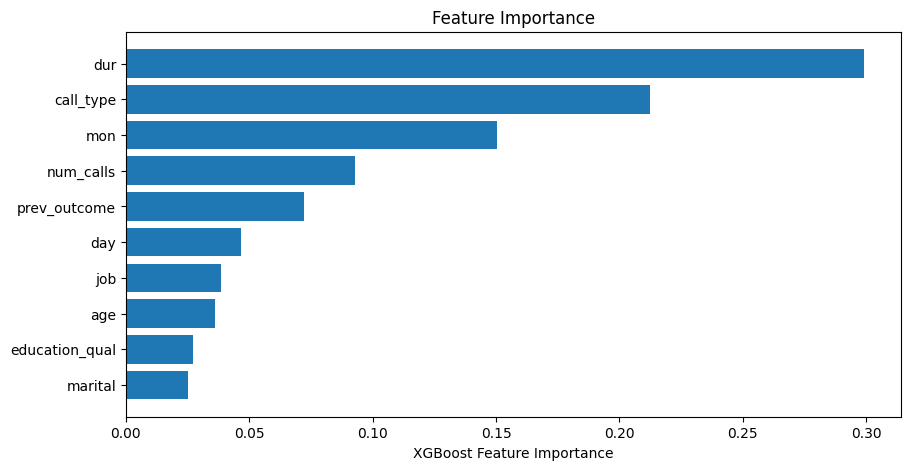

In [ ]:
sorted_idx = xgb_model.feature_importances_.argsort()
plt.figure(figsize=(10,5))
plt.barh(df.columns[sorted_idx], xgb_model.feature_importances_[sorted_idx])
plt.xlabel("XGBoost Feature Importance")
plt.title("Feature Importance")
plt.show()

### Top 3 Important Features
1. Duration of the call in seconds

2. call_type

3. month